In [1]:
# import childespy
import numpy as np
import nltk

In [ ]:
# df = childespy.get_utterances(language='eng')

In [392]:
# df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6942258 entries, 1440 to 6942258
Data columns (total 27 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   id                 6942258 non-null  int32  
 1   gloss              6942258 non-null  object 
 2   stem               6942258 non-null  object 
 3   actual_phonology   6942258 non-null  object 
 4   model_phonology    6942258 non-null  object 
 5   type               6942258 non-null  object 
 6   language           6942258 non-null  object 
 7   num_morphemes      6942258 non-null  int32  
 8   num_tokens         6942258 non-null  int32  
 9   utterance_order    6942258 non-null  int32  
 10  corpus_name        6942258 non-null  object 
 11  part_of_speech     6942258 non-null  object 
 12  speaker_code       6942258 non-null  object 
 13  speaker_name       6942258 non-null  object 
 14  speaker_role       6942258 non-null  object 
 15  target_child_name  6942258 no

In [1]:
import pandas as pd
store = pd.HDFStore('childes_db_store.h5')
store.keys()
pdf = store['pretraining_df']
pdf.index = pdf.index.astype(int)
pdf = pdf.sort_values(['transcript_id', 'utterance_order'])

In [25]:
pdf.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2593159 entries, 1605 to 6940465
Data columns (total 27 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   id                 2593159 non-null  int32  
 1   gloss              2593159 non-null  object 
 2   stem               2593159 non-null  object 
 3   actual_phonology   2593159 non-null  object 
 4   model_phonology    2593159 non-null  object 
 5   type               2593159 non-null  object 
 6   language           2593159 non-null  object 
 7   num_morphemes      2593159 non-null  int32  
 8   num_tokens         2593159 non-null  int32  
 9   utterance_order    2593159 non-null  int32  
 10  corpus_name        2593159 non-null  object 
 11  part_of_speech     2593159 non-null  object 
 12  speaker_code       2593159 non-null  object 
 13  speaker_name       2593159 non-null  object 
 14  speaker_role       2593159 non-null  object 
 15  target_child_name  2593159 no

In [27]:
index = ['transcript_id', 'utterance_order']
pdf_i = pdf.set_index(index).index

In [28]:
index = ['transcript_id', 'utterance_order']
dft_i = df_test.set_index(index).index

In [29]:
pdf_no_test = pdf[~pdf_i.isin(dft_i)]
pdf_no_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2554124 entries, 1605 to 6940465
Data columns (total 27 columns):
 #   Column             Dtype  
---  ------             -----  
 0   id                 int32  
 1   gloss              object 
 2   stem               object 
 3   actual_phonology   object 
 4   model_phonology    object 
 5   type               object 
 6   language           object 
 7   num_morphemes      int32  
 8   num_tokens         int32  
 9   utterance_order    int32  
 10  corpus_name        object 
 11  part_of_speech     object 
 12  speaker_code       object 
 13  speaker_name       object 
 14  speaker_role       object 
 15  target_child_name  object 
 16  target_child_age   float64
 17  target_child_sex   object 
 18  media_start        float64
 19  media_end          float64
 20  media_unit         object 
 21  collection_name    object 
 22  collection_id      int32  
 23  corpus_id          int32  
 24  speaker_id         int32  
 25  target_child_id

In [32]:
pdf_no_test.to_hdf('childes_db_store.h5', 'pretraining_df_no_test')

/var/folders/7d/px46fg093yl0bj0nvmk506j40000gn/T/ipykernel_2341/517979144.py:1: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['gloss', 'stem', 'actual_phonology', 'model_phonology', 'type',
       'language', 'corpus_name', 'part_of_speech', 'speaker_code',
       'speaker_name', 'speaker_role', 'target_child_name', 'target_child_sex',
       'media_unit', 'collection_name'],
      dtype='object')]

  pdf_no_test.to_hdf('childes_db_store.h5', 'pretraining_df_no_test')


In [37]:
from sklearn.model_selection import train_test_split
pdf_nt_train, pdf_nt_val = train_test_split(pdf_no_test, test_size=0.05)
len(pdf_nt_train), len(pdf_nt_val)

(2426417, 127707)

In [55]:
from functools import reduce
def generate_mask(masks, operator='and'):
    """Given a list of string queries, combine them with operator into one big query"""
    return reduce(lambda x, y: f'{x} {operator} {y}', masks)

child_utterance = 'speaker_id == target_child_id'
nonnull_gloss = 'gloss.notnull() and gloss != "" and gloss != "nan"'
nonnnull_child_age = 'target_child_age.notnull()'
pretraining_mask = generate_mask([child_utterance, nonnull_gloss, nonnnull_child_age], 'and')

print('len before:', len(pdf_nt_train))
pdf_nt_train = pdf_nt_train.query(pretraining_mask)
print('len after:', len(pdf_nt_train))

print('len before:', len(pdf_nt_val))
pdf_nt_val = pdf_nt_val.query(pretraining_mask)
print('len after:', len(pdf_nt_val))

len before: 2426417
len after: 2426410
len before: 127707
len after: 127707


In [57]:
pdf_nt_train[['gloss']].to_csv('pretraining_df_nt_train.csv', index=False)
pdf_nt_val[['gloss']].to_csv('pretraining_df_nt_val.csv', index=False)

In [59]:
pdf_nt_train[:100][['gloss']].to_csv('pretraining_df_nt_train_toy.csv', index=False)
pdf_nt_val[:100][['gloss']].to_csv('pretraining_df_nt_val_toy.csv', index=False)

In [54]:
pdf_nt_train.head()

,id,gloss,stem,actual_phonology,model_phonology,type,language,num_morphemes,num_tokens,utterance_order,...,target_child_sex,media_start,media_end,media_unit,collection_name,collection_id,corpus_id,speaker_id,target_child_id,transcript_id
5876979,15390590,he is my xxx,he be my,,,declarative,eng,4,4,281,...,female,NaN,NaN,None,Clinical-MOR,17,283,20690,20690,34710
6366736,17259406,xxx,,vo,,declarative,eng,-2147483648,1,137,...,female,2681.275,2684.275,s,Eng-NA,21,335,23467,23467,43152
6819099,17711769,xxx,,*,*,declarative,eng,-2147483648,1,968,...,male,2665.716,2669.163,s,Eng-NA,21,336,23530,23530,43559
1346270,1632831,uhhuh two four one two four,uhhuh two four one two four,,,declarative,eng,6,6,1071,...,male,5227.846,5234.624,s,Eng-NA,2,54,3142,3142,6992
4156463,9758823,Grandma,Grandma,,,declarative,eng,1,1,345,...,male,911.021,912.043,s,Eng-UK,12,224,15547,15547,25200


In [50]:
pdf_nt_train.query('gloss == "nan"')

,id,gloss,stem,actual_phonology,model_phonology,type,language,num_morphemes,num_tokens,utterance_order,...,target_child_sex,media_start,media_end,media_unit,collection_name,collection_id,corpus_id,speaker_id,target_child_id,transcript_id
1333629,1619519,nan,nan,,,declarative,eng,1,1,371,...,male,NaN,NaN,None,Eng-NA,2,54,3142,3142,6995
6025405,15539366,nan,nan,,,declarative,eng,1,1,240,...,male,NaN,NaN,None,Clinical-MOR,17,287,20823,20823,35140
2195500,2490985,nan,,,,declarative,eng,-2147483648,1,59,...,male,189.512,190.982,s,Eng-NA,2,73,3953,3953,9672
3355274,8957634,nan,,,,declarative,eng,-2147483648,1,314,...,male,839.403,840.215,s,Eng-UK,12,223,15481,15481,24672
2642514,8244874,nan,nan,,,imperative_emphatic,eng,1,1,59,...,female,NaN,NaN,None,Eng-UK,12,218,15386,15386,24114
3272062,8874422,nan,,,,missing CA terminator,eng,-2147483648,1,122,...,female,NaN,NaN,None,Eng-UK,12,222,15474,15474,24598
3293459,8895819,nan,,,,missing CA terminator,eng,-2147483648,1,648,...,female,NaN,NaN,None,Eng-UK,12,222,15474,15474,24602


In [48]:
pd.isna(pdf_nt_train.iloc[11606])

id                   False
gloss                False
stem                 False
actual_phonology     False
model_phonology      False
type                 False
language             False
num_morphemes        False
num_tokens           False
utterance_order      False
corpus_name          False
part_of_speech       False
speaker_code         False
speaker_name         False
speaker_role         False
target_child_name    False
target_child_age     False
target_child_sex     False
media_start           True
media_end             True
media_unit            True
collection_name      False
collection_id        False
corpus_id            False
speaker_id           False
target_child_id      False
transcript_id        False
Name: 1333629, dtype: bool

In [40]:
pdf_nt_train.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2426417 entries, 5876979 to 504488
Data columns (total 27 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   id                 2426417 non-null  int32  
 1   gloss              2426417 non-null  object 
 2   stem               2426417 non-null  object 
 3   actual_phonology   2426417 non-null  object 
 4   model_phonology    2426417 non-null  object 
 5   type               2426417 non-null  object 
 6   language           2426417 non-null  object 
 7   num_morphemes      2426417 non-null  int32  
 8   num_tokens         2426417 non-null  int32  
 9   utterance_order    2426417 non-null  int32  
 10  corpus_name        2426417 non-null  object 
 11  part_of_speech     2426417 non-null  object 
 12  speaker_code       2426417 non-null  object 
 13  speaker_name       2426417 non-null  object 
 14  speaker_role       2426417 non-null  object 
 15  target_child_name  2426417 

In [41]:
pdf_nt_val.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127707 entries, 2332307 to 6807221
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 127707 non-null  int32  
 1   gloss              127707 non-null  object 
 2   stem               127707 non-null  object 
 3   actual_phonology   127707 non-null  object 
 4   model_phonology    127707 non-null  object 
 5   type               127707 non-null  object 
 6   language           127707 non-null  object 
 7   num_morphemes      127707 non-null  int32  
 8   num_tokens         127707 non-null  int32  
 9   utterance_order    127707 non-null  int32  
 10  corpus_name        127707 non-null  object 
 11  part_of_speech     127707 non-null  object 
 12  speaker_code       127707 non-null  object 
 13  speaker_name       127707 non-null  object 
 14  speaker_role       127707 non-null  object 
 15  target_child_name  127707 non-null  object 


In [30]:
df_test = pd.read_csv('Apr112022_child_adult_reformulations_nonull_test.csv')
df_test.head()

,gloss,parent_gloss,child_utterance_stem,adult_reformulation_stem,gloss_dist_norm,stem_dist_norm,gloss_dist,stem_dist,type,target_child_age,utterance_order,transcript_id,gloss_len,parent_gloss_len,stem_len,parent_stem_len
0,cheeky now,who's cheeky now,cheek now,who cheek now,0.333333,0.333333,1,1,declarative,29.460564,270,24733,2,3,2,3
1,es per man in a suit suit,the man's in a suitsuit,man in a suit suit,the man in a suitsuit,0.714286,0.600000,5,3,declarative,35.197848,1099,24846,7,5,5,5
2,I felt good,felt good,I feel good,felt good,0.333333,0.666667,1,2,declarative,57.001170,8334,4136,3,2,3,2
3,that's cheese also,that is cheese also,that cheese also,that be cheese also,0.500000,0.250000,2,1,declarative,24.000493,344,10687,3,4,3,4
4,no,no,no,no,0.000000,0.000000,0,0,declarative,39.000801,531,34731,1,1,1,1


In [2]:
import pandas as pd
store = pd.HDFStore('childes_db_store.h5')
store.keys()
df = store['childes_eng_df']
df.index = df.index.astype(int)
df = df.sort_values(['transcript_id', 'utterance_order'])

In [3]:
df.head()

,id,gloss,stem,actual_phonology,model_phonology,type,language,num_morphemes,num_tokens,utterance_order,...,target_child_sex,media_start,media_end,media_unit,collection_name,collection_id,corpus_id,speaker_id,target_child_id,transcript_id
1440,1440,well you wanna,well you want,,,question,eng,4,3,1,...,female,NaN,NaN,None,Frogs,1,1,3,1,1
1456,1456,now what I have next is another book,now what I have next be another book,,,declarative,eng,9,8,2,...,female,NaN,NaN,None,Frogs,1,1,3,1,1
1464,1464,this is a smaller book though,this be a small book though,,,declarative,eng,8,6,3,...,female,NaN,NaN,None,Frogs,1,1,3,1,1
1472,1472,this one's called a boy a dog and a frog,this one call a boy a dog and a frog,,,declarative,eng,12,10,4,...,female,NaN,NaN,None,Frogs,1,1,3,1,1
1498,1498,and like the last book there are no words but ...,and like the last book there be no word but re...,,,trail off,eng,18,13,5,...,female,NaN,NaN,None,Frogs,1,1,3,1,1


In [3]:
"""
Thinking about how to extract reformulations

for each adult utterance:
  check the distance between that utterance and the last K utterances
  if any of them are less than 0.7 Lev. dist., include them as a reformulation pair
"""

'\nThinking about how to extract reformulations\n\nfor each adult utterance:\n  check the distance between that utterance and the last K utterances\n  if any of them are less than 0.7 Lev. dist., include them as a reformulation pair\n'

In [51]:
# For pretraining data: we should probably restrict to child utterances, non-null gloss
from functools import reduce
def generate_mask(masks, operator='and'):
    """Given a list of string queries, combine them with operator into one big query"""
    return reduce(lambda x, y: f'{x} {operator} {y}', masks)

child_utterance = 'speaker_id == target_child_id'
nonnull_gloss = 'gloss.notnull() and gloss != "" and gloss != "nan"'
nonnnull_child_age = 'target_child_age.notnull()'


In [53]:
print(pretraining_df.info(verbose=True, show_counts=True))
pretraining_mask = generate_mask([child_utterance, nonnull_gloss, nonnnull_child_age], 'and')
pretraining_df = pretraining_df.query(pretraining_mask)
print(pretraining_df.info(verbose=True, show_counts=True))

NameError: name 'pretraining_df' is not defined

In [5]:
pretraining_df[['gloss', 'speaker_id', 'target_child_id', 'target_child_age']].head()

,gloss,speaker_id,target_child_id,target_child_age
1605,okay,1,1,80.001643
1613,there's a boy,1,1,80.001643
1621,and he wants to go fishing,1,1,80.001643
1640,xxx xxx,1,1,80.001643
1650,and he went,1,1,80.001643


In [6]:
pretraining_df.to_hdf('childes_db_store.h5', 'pretraining_df')

/var/folders/7d/px46fg093yl0bj0nvmk506j40000gn/T/ipykernel_93525/1309082943.py:1: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['gloss', 'stem', 'actual_phonology', 'model_phonology', 'type',
       'language', 'corpus_name', 'part_of_speech', 'speaker_code',
       'speaker_name', 'speaker_role', 'target_child_name', 'target_child_sex',
       'media_unit', 'collection_name'],
      dtype='object')]

  pretraining_df.to_hdf('childes_db_store.h5', 'pretraining_df')


In [6]:
# For supervised mapping task: non-null speaker ID, target child ID, target child age, gloss, and stem

nonnull_speaker_id = 'speaker_id.notnull()'
nonnull_child_id = 'target_child_id.notnull()'
nonnull_stem = 'stem.notnull() and stem != ""'
ft_masks = [nonnull_speaker_id, nonnull_child_id, nonnnull_child_age, nonnull_gloss, nonnull_stem]
finetune_mask = generate_mask(ft_masks, 'and')
finetune_df = df.query(finetune_mask)

In [7]:
del df

In [8]:
finetune_df[['gloss', 'speaker_id', 'target_child_id', 'target_child_age', 'transcript_id', 'utterance_order']].head()

,gloss,speaker_id,target_child_id,target_child_age,transcript_id,utterance_order
1440,well you wanna,3,1,80.001643,1,1
1456,now what I have next is another book,3,1,80.001643,1,2
1464,this is a smaller book though,3,1,80.001643,1,3
1472,this one's called a boy a dog and a frog,3,1,80.001643,1,4
1498,and like the last book there are no words but ...,3,1,80.001643,1,5


In [13]:
finetune_df.tail()

,id,gloss,stem,actual_phonology,model_phonology,type,language,num_morphemes,num_tokens,utterance_order,...,target_child_sex,media_start,media_end,media_unit,collection_name,collection_id,corpus_id,speaker_id,target_child_id,transcript_id
6940391,19433174,cut the orange up,cut the orange up,kʌt ðə rɒrındʒ ʌp,,declarative,eng,5,4,1,...,female,NaN,NaN,None,Eng-UK,30,387,25297,25297,49727
6940405,19433188,what have you done that for,what have you do that for,wɒt əv ju dʌn ðæt fɔ,,question,eng,7,6,2,...,female,NaN,NaN,None,Eng-UK,30,387,25297,25297,49727
6940418,19433201,the smoke's coming out isn't it,the smoke come out be it,ðə sməʊks kʌmıŋ ɑʊt ıznt ıt,,question,eng,10,6,3,...,female,NaN,NaN,None,Eng-UK,30,387,25297,25297,49727
6940453,19433236,I thought I was hearing you,I think I be hear you,a ɵɔt a wɒz hıərıŋ ju,,declarative,eng,10,6,1,...,female,NaN,NaN,None,Eng-UK,30,387,25297,25297,49728
6940465,19433248,can it not work,can it not work,kæn ıt nɒt wəːk,,question,eng,4,4,2,...,female,NaN,NaN,None,Eng-UK,30,387,25297,25297,49728


In [ ]:
"""
Okay what we need to do:

- Compare adult utterance and 1-back: add to dataset if child utt, and stem_dist_norm below 0.7
- Otherwise, Compare adult utterance and 2-back: ""
- Otherwise, Compare adult utterance and 3-back: ""

"""

In [19]:
for x in finetune_df.iloc[0].keys():
    print(x)

id
gloss
stem
actual_phonology
model_phonology
type
language
num_morphemes
num_tokens
utterance_order
corpus_name
part_of_speech
speaker_code
speaker_name
speaker_role
target_child_name
target_child_age
target_child_sex
media_start
media_end
media_unit
collection_name
collection_id
corpus_id
speaker_id
target_child_id
transcript_id


In [22]:
def leven(x, y):
    x = nltk.word_tokenize(x)
    y = nltk.word_tokenize(y)
    n = len(x)
    m = len(y)

    A = [[i + j for j in range(m + 1)] for i in range(n + 1)]

    for i in range(n):
        for j in range(m):
            A[i + 1][j + 1] = min(A[i][j + 1] + 1,              # insert
                                  A[i + 1][j] + 1,              # delete
                                  A[i][j] + int(x[i] != y[j]))  # replace

    return A[n][m]

In [28]:
# So...basically I want, for each adult utterance, to go back a few utterances, and see if there was a child utterance that was similar. If so, we accept that as the reformulation.
from nltk import word_tokenize
from tqdm import tqdm

# So...for each adult utterance, let's make a df with (adult, last1, howfarback: 1), (adult, last2, howfarback: 2), (adult, last3, howfarback: 3), (adult2, ....
from collections import defaultdict

window_size = 3
new_data = defaultdict(list)
for i in tqdm(range(window_size, len(finetune_df))):
    row = finetune_df.iloc[i]
    if row['speaker_id'] == row['target_child_id']:
        continue # looking for adult speakers only
    for steps_back in range(1, window_size + 1):
        prev_row = finetune_df.iloc[i - steps_back]
        if (prev_row['speaker_id'] == prev_row['target_child_id'] and 
            row['transcript_id'] == prev_row['transcript_id'] and
            (leven(row['stem'], prev_row['stem']) / 
             max(len(word_tokenize(row['stem'])), 
                 len(word_tokenize(prev_row['stem']))) <= 0.7)):
            for key in row.keys():
                new_data[f'adult_{key}'].append(row[key])
            for key in prev_row.keys():
                new_data[f'child_{key}'].append(prev_row[key])
            new_data['steps_between_utterances'].append(steps_back)
            break # only record one reformulation per adult utterance

100%|█████████████████████████████████████████████████████| 5610149/5610149 [20:21<00:00, 4594.21it/s]


In [35]:
print(len(ca_df))
print(len(ca_df.query('steps_between_utterances == 1')))

353737
263543


In [ ]:
ca_df = pd.DataFrame(new_data)
print(ca_df.info(verbose=True, show_counts=True))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353737 entries, 0 to 353736
Data columns (total 55 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   adult_id                  353737 non-null  int32  
 1   adult_gloss               353737 non-null  object 
 2   adult_stem                353737 non-null  object 
 3   adult_actual_phonology    353737 non-null  object 
 4   adult_model_phonology     353737 non-null  object 
 5   adult_type                353737 non-null  object 
 6   adult_language            353737 non-null  object 
 7   adult_num_morphemes       353737 non-null  int32  
 8   adult_num_tokens          353737 non-null  int32  
 9   adult_utterance_order     353737 non-null  int32  
 10  adult_corpus_name         353737 non-null  object 
 11  adult_part_of_speech      353737 non-null  object 
 12  adult_speaker_code        353737 non-null  object 
 13  adult_speaker_name        353737 non-null  o

,adult_gloss,child_gloss,steps_between_utterances
0,you did,I did,2
1,okay,okay,3
2,okay,okay,2
4,mercer Mayer,mercer Mayer,2
6,no it also takes your picture,will it take my picture too,2


In [43]:
ca_df.query('steps_between_utterances > 1')[
    ['adult_gloss', 'child_gloss', 'steps_between_utterances', 'child_target_child_age']
].sample(n=10)

,adult_gloss,child_gloss,steps_between_utterances,child_target_child_age
124194,where is Thomas,xxx Thomas,2,26.723341
199652,hello,hello,2,56.001150
112045,little one said I'm getting cold,oh I'm getting cold,2,28.394834
72240,what were you for Halloween,is Marky going to be the clown for Halloween,3,34.033553
124251,he is a naughty car isn't he,a naughty car,2,26.723341
18712,hi Daddy,hi Seth,2,23.460441
125144,that you liked,that's a truck,2,29.887677
30143,that's alright,is that okay,2,62.329822
120407,there's another little man,little men,3,30.953408
13598,Missus miss mouse,the mouse,2,57.001170


In [42]:
ca_df.query('steps_between_utterances > 1')[
    ['adult_gloss', 'child_gloss', 'steps_between_utterances', 'child_target_child_age']
].sample(n=10)

,adult_gloss,child_gloss,steps_between_utterances,child_target_child_age
226576,that's that's Twww,that's Jwww,2,28.197704
37489,I hear the xxx,yeah I hear it too,3,49.198135
4172,color the board yup the cardboard,duh board,3,27.920491
138150,doesn't he,xxx doesn't he,2,34.362102
32148,hungry,hungry,3,45.822296
40594,you're getting confused xxx on Tuesday he,no on on on ter Tuesday he he eat,3,88.363211
140125,what to do,now what to do,2,32.460625
146667,no,no,3,23.493296
90530,oh you're pointing to the train yeah,pointing to the train,3,31.230621
210768,jigsaw Mum,but Mum,2,36.132159


In [ ]:
ca_df.to_hdf('childes_db_store.h5', 'child_adult_df')

## Extract child statement, followed by parent question

The hope being that some of these are adult reformulations

In [17]:
df['type'].value_counts()

declarative                   5010735
question                      1535722
imperative_emphatic            198973
trail off                      106272
interruption                    33801
self interruption               22085
missing CA terminator           21161
quotation next line              8100
trail off question               1774
interruption question            1631
self interruption question       1096
quotation precedes                863
broken for coding                  31
question exclamation               11
no break TCU continuation           3
Name: type, dtype: int64

In [4]:
df.index = df.index.astype(int)
df = df.sort_values(['transcript_id', 'utterance_order'])

In [349]:
# NOTE: for now, not restricting utterance type and seeing what happens

child_decl = (
    (df['speaker_id'] == df['target_child_id'])
    # & (df['type'] == 'declarative') 
)

after_child_decl = np.concatenate(([False], child_decl.values[:-1]))
prev_target_child_id = np.concatenate(([None], df['target_child_id'].values[:-1]))
parent_followup_q = (
    after_child_decl 
    # & (df['type'] == 'question')
    & (prev_target_child_id == df['target_child_id']) 
    & (df['speaker_id'] != df['target_child_id'])
)
child_decl_before_q = np.concatenate((parent_followup_q.values[1:], [False]))

In [350]:
sdf = df[child_decl_before_q | parent_followup_q]
sdf_child = df[child_decl_before_q]
sdf_parent = df[parent_followup_q]

In [351]:
ssdf_c = sdf_child[['gloss', 'stem', 'type', 'target_child_age', 
                    'utterance_order', 'transcript_id']].copy()
ssdf_p = sdf_parent[['gloss', 'stem', 'type', 'target_child_age', 
                     'utterance_order', 'transcript_id']].copy()
assert(len(ssdf_c) == len(ssdf_p))

# make sure target age for child is matching between parent/child (and non-null)
matching_child_age = (ssdf_c['target_child_age'].values == ssdf_p['target_child_age'].values)
ssdf_c = ssdf_c[matching_child_age]
ssdf_p = ssdf_p[matching_child_age]

# ssdf_p = ssdf_p.query('target_child_age >= 24 and target_child_age < 36')
# ssdf_c = ssdf_c.query('target_child_age >= 24 and target_child_age < 36')
assert(len(ssdf_c) == len(ssdf_p))

ssdf_c['parent_gloss'] = ssdf_p['gloss'].values
ssdf_c['parent_stem'] = ssdf_p['stem'].values
ssdf_c['parent_type'] = ssdf_p['type'].values

In [352]:
gloss_leven_dists = [leven(x, y) for x, y in zip(ssdf_c['gloss'], ssdf_c['parent_gloss'])]
ssdf_c['gloss_dist'] = gloss_leven_dists

ssdf_c['gloss_len'] = [len(x.split()) for x in ssdf_c['gloss']]
ssdf_c['parent_gloss_len'] = [len(x.split()) for x in ssdf_c['parent_gloss']]

ssdf_c['gloss_dist_norm'] = (ssdf_c['gloss_dist'] / 
                             (ssdf_c[['gloss_len', 'parent_gloss_len']].max(axis=1)))

stem_leven_dists = [leven(x, y) for x, y in zip(ssdf_c['stem'], ssdf_c['parent_stem'])]
ssdf_c['stem_dist'] = stem_leven_dists

ssdf_c['stem_len'] = [len(x.split()) for x in ssdf_c['stem']]
ssdf_c['parent_stem_len'] = [len(x.split()) for x in ssdf_c['parent_stem']]

ssdf_c['stem_dist_norm'] = (ssdf_c['stem_dist'] / 
                            (ssdf_c[['stem_len', 'parent_stem_len']].max(axis=1)))


In [363]:
# reorder columns
ssdf_c = ssdf_c[['gloss', 'parent_gloss', 'stem', 'parent_stem',
                 'gloss_dist_norm', 'stem_dist_norm', 'gloss_dist','stem_dist',
                 'type', 'parent_type', 'target_child_age', 'utterance_order', 'transcript_id', 
                 'gloss_len', 'parent_gloss_len', 'stem_len', 'parent_stem_len', ]]

In [361]:
ssdf_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1617996 entries, 1579 to 6919674
Data columns (total 17 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   gloss             1617996 non-null  object 
 1   parent_gloss      1617996 non-null  object 
 2   stem              1617996 non-null  object 
 3   parent_stem       1617996 non-null  object 
 4   gloss_dist_norm   1608039 non-null  float64
 5   stem_dist_norm    1502246 non-null  float64
 6   gloss_dist        1617996 non-null  int64  
 7   stem_dist         1617996 non-null  int64  
 8   type              1617996 non-null  object 
 9   target_child_age  1617996 non-null  float64
 10  utterance_order   1617996 non-null  int32  
 11  transcript_id     1617996 non-null  int32  
 12  gloss_len         1617996 non-null  int64  
 13  parent_gloss_len  1617996 non-null  int64  
 14  stem_len          1617996 non-null  int64  
 15  parent_stem_len   1617996 non-null  int64  
 1

In [355]:
ssdf_c.to_csv('child_parent_reformulations_unrestricted_utterance_type.csv', index=False)

In [356]:
# using gloss vs. stem usually doesn't change the edit distance
# but if it does, the stem usually pulls the two closer 
# (since it's the base forms of the words)
# so probably should use stem distance over gloss

print((ssdf_c['gloss_dist_norm'] == ssdf_c['stem_dist_norm']).mean())
print((ssdf_c['gloss_dist_norm'] < ssdf_c['stem_dist_norm']).mean())
print((ssdf_c['gloss_dist_norm'] > ssdf_c['stem_dist_norm']).mean())

0.8517394356969981
0.01114712273701542
0.06557432774864709


In [383]:
ssdf_c[
    (ssdf_c['stem_dist_norm'] >= 0)
    & (ssdf_c['stem_dist_norm'] <= 0.7) 
    # & (ssdf_c['target_child_age'] >= 48) 
    & (ssdf_c['target_child_age'] >= 30)
].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260239 entries, 93 to 6919539
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   gloss             260239 non-null  object 
 1   parent_gloss      260239 non-null  object 
 2   stem              260239 non-null  object 
 3   parent_stem       260239 non-null  object 
 4   gloss_dist_norm   260239 non-null  float64
 5   stem_dist_norm    260239 non-null  float64
 6   gloss_dist        260239 non-null  int64  
 7   stem_dist         260239 non-null  int64  
 8   type              260239 non-null  object 
 9   parent_type       260239 non-null  object 
 10  target_child_age  260239 non-null  float64
 11  utterance_order   260239 non-null  int32  
 12  transcript_id     260239 non-null  int32  
 13  gloss_len         260239 non-null  int64  
 14  parent_gloss_len  260239 non-null  int64  
 15  stem_len          260239 non-null  int64  
 16  parent_stem_len   

In [393]:
ssdf_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1617996 entries, 1579 to 6919674
Data columns (total 17 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   gloss             1617996 non-null  object 
 1   parent_gloss      1617996 non-null  object 
 2   stem              1617996 non-null  object 
 3   parent_stem       1617996 non-null  object 
 4   gloss_dist_norm   1608039 non-null  float64
 5   stem_dist_norm    1502246 non-null  float64
 6   gloss_dist        1617996 non-null  int64  
 7   stem_dist         1617996 non-null  int64  
 8   type              1617996 non-null  object 
 9   parent_type       1617996 non-null  object 
 10  target_child_age  1617996 non-null  float64
 11  utterance_order   1617996 non-null  int32  
 12  transcript_id     1617996 non-null  int32  
 13  gloss_len         1617996 non-null  int64  
 14  parent_gloss_len  1617996 non-null  int64  
 15  stem_len          1617996 non-null  int64  
 1

In [400]:
ssdf_c[ssdf_c['stem'] != ''].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296150 entries, 1605 to 6919674
Data columns (total 17 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   gloss             1296150 non-null  object 
 1   parent_gloss      1296150 non-null  object 
 2   stem              1296150 non-null  object 
 3   parent_stem       1296150 non-null  object 
 4   gloss_dist_norm   1296150 non-null  float64
 5   stem_dist_norm    1296150 non-null  float64
 6   gloss_dist        1296150 non-null  int64  
 7   stem_dist         1296150 non-null  int64  
 8   type              1296150 non-null  object 
 9   parent_type       1296150 non-null  object 
 10  target_child_age  1296150 non-null  float64
 11  utterance_order   1296150 non-null  int32  
 12  transcript_id     1296150 non-null  int32  
 13  gloss_len         1296150 non-null  int64  
 14  parent_gloss_len  1296150 non-null  int64  
 15  stem_len          1296150 non-null  int64  
 1

In [409]:
ss

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1253996 entries, 2 to 1617995
Data columns (total 16 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   gloss             1253964 non-null  object 
 1   parent_gloss      1253995 non-null  object 
 2   stem              1253996 non-null  object 
 3   parent_stem       1253996 non-null  object 
 4   gloss_dist_norm   1253996 non-null  float64
 5   stem_dist_norm    1253996 non-null  float64
 6   gloss_dist        1253996 non-null  int64  
 7   stem_dist         1253996 non-null  int64  
 8   type              1253996 non-null  object 
 9   target_child_age  1253996 non-null  float64
 10  utterance_order   1253996 non-null  int64  
 11  transcript_id     1253996 non-null  int64  
 12  gloss_len         1253996 non-null  int64  
 13  parent_gloss_len  1253996 non-null  int64  
 14  stem_len          1253996 non-null  int64  
 15  parent_stem_len   1253996 non-null  int64  
dtype

In [413]:
ssdf_c_notna[(ssdf_c_notna['stem_dist_norm'] <= 0.7) & 
       (ssdf_c_notna['target_child_age'] < 600000)].head(10)

,gloss,parent_gloss,child_utterance_stem,adult_reformulation_stem,gloss_dist_norm,stem_dist_norm,gloss_dist,stem_dist,type,target_child_age,utterance_order,transcript_id,gloss_len,parent_gloss_len,stem_len,parent_stem_len
77,uhoh,uhoh,uhoh,uhoh,0.000000,0.000000,0,0,declarative,79.001622,3,10,1,1,1,1
84,I'm all ready,all right,I all ready,all right,0.666667,0.666667,2,2,declarative,79.001622,39,10,3,2,3,2
121,yeah,yeah,yeah,yeah,0.000000,0.000000,0,0,declarative,78.001602,17,13,1,1,1,1
141,hard,that was hard,hard,that be hard,0.666667,0.666667,2,2,declarative,78.001602,4,15,1,3,1,3
147,where's the first xxx page,here's the first page,where the first page,here the first page,0.400000,0.250000,2,1,question,78.001602,28,15,5,4,4,4
153,his favorite word guess what his favorite word is,what's his favorite word,guess what his favorite word be,what his favorite word,0.666667,0.333333,6,2,question,78.001602,48,15,9,4,6,4
154,mine,mine,mine,mine,0.000000,0.000000,0,0,declarative,78.001602,50,15,1,1,1,1
159,a xxx,that's a log,a,that a log,0.666667,0.666667,2,2,declarative,78.001602,74,15,2,3,1,3
196,yeah,yeah,yeah,yeah,0.000000,0.000000,0,0,declarative,78.001602,13,18,1,1,1,1
201,and the frog,and that's the end,and the frog,and that the end,0.500000,0.500000,2,2,declarative,78.001602,43,18,3,4,3,4


In [417]:
ssdf_c_notna = ssdf_c_notna.rename(columns={
    'stem': 'child_utterance_stem', 'parent_stem': 'adult_reformulation_stem'})
df_reformulations = ssdf_c_notna[(ssdf_c_notna['stem_dist_norm'] <= 0.7)]
df_reformulations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260239 entries, 58 to 1253992
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   gloss                     260228 non-null  object 
 1   parent_gloss              260239 non-null  object 
 2   child_utterance_stem      260239 non-null  object 
 3   adult_reformulation_stem  260239 non-null  object 
 4   gloss_dist_norm           260239 non-null  float64
 5   stem_dist_norm            260239 non-null  float64
 6   gloss_dist                260239 non-null  int64  
 7   stem_dist                 260239 non-null  int64  
 8   type                      260239 non-null  object 
 9   target_child_age          260239 non-null  float64
 10  utterance_order           260239 non-null  int64  
 11  transcript_id             260239 non-null  int64  
 12  gloss_len                 260239 non-null  int64  
 13  parent_gloss_len          260239 non-null 

In [418]:
df_reformulations = df_reformulations.sort_values(['transcript_id', 'utterance_order'])
df_reformulations.to_csv('Apr112022_child_adult_reformulations_nonull.csv', index=False)

In [27]:
from sklearn.model_selection import train_test_split
import pandas as pd

df_reformulations = pd.read_csv('Apr112022_child_adult_reformulations_nonull.csv')
nonull_gloss = (df_reformulations['gloss'].notna() & df_reformulations['parent_gloss'].notna())
df_reformulations = df_reformulations[nonull_gloss]
df_reformulations.to_csv('Apr112022_child_adult_reformulations_nonull.csv', index=False)
# train/val/test: 75/10/15 split
df_train, df_test = train_test_split(df_reformulations, 
                                     test_size=0.15, random_state=3141)
df_train, df_val = train_test_split(df_train, 
                                    test_size=0.1/0.85, random_state=3141)

In [12]:
df_reformulations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260228 entries, 0 to 260227
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   gloss                     260228 non-null  object 
 1   parent_gloss              260228 non-null  object 
 2   child_utterance_stem      260228 non-null  object 
 3   adult_reformulation_stem  260228 non-null  object 
 4   gloss_dist_norm           260228 non-null  float64
 5   stem_dist_norm            260228 non-null  float64
 6   gloss_dist                260228 non-null  int64  
 7   stem_dist                 260228 non-null  int64  
 8   type                      260228 non-null  object 
 9   target_child_age          260228 non-null  float64
 10  utterance_order           260228 non-null  int64  
 11  transcript_id             260228 non-null  int64  
 12  gloss_len                 260228 non-null  int64  
 13  parent_gloss_len          260228 non-null  i

In [ ]:
below_age_cutoff = df_reformulations['target_child_age'] < 30
print(df_reformulations[below_age_cutoff].info())
print(df_reformulations[~below_age_cutoff].info())
df_reformulations[below_age_cutoff].head()

In [28]:
print(df_train.info())
print(df_val.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195170 entries, 205927 to 213276
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   gloss                     195170 non-null  object 
 1   parent_gloss              195170 non-null  object 
 2   child_utterance_stem      195170 non-null  object 
 3   adult_reformulation_stem  195170 non-null  object 
 4   gloss_dist_norm           195170 non-null  float64
 5   stem_dist_norm            195170 non-null  float64
 6   gloss_dist                195170 non-null  int64  
 7   stem_dist                 195170 non-null  int64  
 8   type                      195170 non-null  object 
 9   target_child_age          195170 non-null  float64
 10  utterance_order           195170 non-null  int64  
 11  transcript_id             195170 non-null  int64  
 12  gloss_len                 195170 non-null  int64  
 13  parent_gloss_len          195170 non-nu

In [29]:
df_train.to_csv('Apr112022_child_adult_reformulations_nonull_train.csv', index=False)
df_val.to_csv('Apr112022_child_adult_reformulations_nonull_val.csv', index=False)
df_test.to_csv('Apr112022_child_adult_reformulations_nonull_test.csv', index=False)

In [22]:
print(len(df_train.query('target_child_age < 36')))
print(len(df_train.query('target_child_age >= 36')))

128667
66512


In [25]:
print(df_val.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024 entries, 0 to 26023
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gloss                     26023 non-null  object 
 1   parent_gloss              26024 non-null  object 
 2   child_utterance_stem      26024 non-null  object 
 3   adult_reformulation_stem  26024 non-null  object 
 4   gloss_dist_norm           26024 non-null  float64
 5   stem_dist_norm            26024 non-null  float64
 6   gloss_dist                26024 non-null  int64  
 7   stem_dist                 26024 non-null  int64  
 8   type                      26024 non-null  object 
 9   target_child_age          26024 non-null  float64
 10  utterance_order           26024 non-null  int64  
 11  transcript_id             26024 non-null  int64  
 12  gloss_len                 26024 non-null  int64  
 13  parent_gloss_len          26024 non-null  int64  
 14  stem_l

In [ ]:
ssdf_c_young = ssdf_c[ssdf_c['target_child_age'] < 30]
print(len(ssdf_c_young))
ssdf_c_young['stem_dist_norm'].hist()

In [386]:
ssdf_c_young['stem_dist_norm'].mean()

0.8459268237957849

391879


<AxesSubplot:>

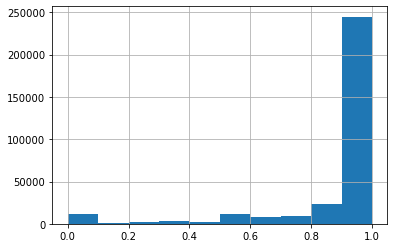

In [390]:
ssdf_c_old = ssdf_c[ssdf_c['target_child_age'] >= 48]
print(len(ssdf_c_old))
ssdf_c_old['stem_dist_norm'].hist()

In [391]:
ssdf_c_old['stem_dist_norm'].mean()

0.8996004047679451

In [191]:
rand_choices = np.random.choice(len(ssdf_c), 10)
ssdf_c.iloc[rand_choices]

,gloss,parent_gloss,stem,parent_stem,gloss_dist_norm,stem_dist_norm,gloss_dist,stem_dist,type,target_child_age,utterance_order,transcript_id,gloss_len,parent_gloss_len,stem_len,parent_stem_len
4604122,xxx,xxx primroses xxx didn't you,,primrose do you,0.800000,1.000000,4,3,declarative,60.099797,9,25604,1,5,0,3
1373794,you use this pen this pen,is that a pen,you use this pen this pen,be that a pen,0.833333,0.833333,5,5,declarative,32.394916,1658,7004,6,4,6,4
6148130,five,five,,,0.000000,NaN,0,0,declarative,50.395285,457,36790,1,1,0,0
3131840,blue,where's her red jacket,blue,where her red jacket,1.000000,1.000000,4,4,declarative,31.394895,317,24462,1,4,1,4
6091188,xxx finshed,how do you say hello,,,1.000000,NaN,5,0,declarative,48.132405,689,36302,2,5,0,0
2968744,horsie,a horse,horse,a horse,1.000000,0.500000,2,1,declarative,31.657734,1094,24328,1,2,1,2
4075838,I don't wanna,but you xxx on the furniture,I do want,but you on the furniture,1.000000,1.000000,6,5,declarative,36.066449,573,25142,3,6,3,5
1630374,Pinkuh,what,Pinkuh,what,1.000000,1.000000,1,1,declarative,46.986591,14,7419,1,1,1,1
4743707,do that,what do you wanna do Miranda today,do that,what do you want do Miranda today,0.857143,0.857143,6,6,declarative,30.592004,80,25971,2,7,2,7
3346237,oh dear,is the driver sitting in the cab,oh dear,be the drive sit in the cab,1.000000,1.000000,7,7,declarative,26.033389,891,24660,2,7,2,7


In [125]:
def leven(x, y):
    x = x.split()
    y = y.split()
    n = len(x)
    m = len(y)

    A = [[i + j for j in range(m + 1)] for i in range(n + 1)]

    for i in range(n):
        for j in range(m):
            A[i + 1][j + 1] = min(A[i][j + 1] + 1,              # insert
                                  A[i + 1][j] + 1,              # delete
                                  A[i][j] + int(x[i] != y[j]))  # replace

    return A[n][m]

In [ ]:
child_st = (df['type'] == 'question') & (df['speaker_id'] != df['target_child_id'])
after_parent_question = np.concatenate(([False], parent_question.values[:-1]))
prev_target_child_id = np.concatenate(([None], df['target_child_id'].values[:-1]))
child_answer = after_parent_question & (prev_target_child_id == df['target_child_id']) & (df['speaker_id'] == df['target_child_id'])
before_child_answer = np.concatenate((child_answer.values[1:], [False]))

In [4]:
df = df.sort_values(['transcript_id', 'utterance_order'])

In [5]:
parent_question = (df['type'] == 'question') & (df['speaker_id'] != df['target_child_id'])
after_parent_question = np.concatenate(([False], parent_question.values[:-1]))
prev_target_child_id = np.concatenate(([None], df['target_child_id'].values[:-1]))
child_answer = after_parent_question & (prev_target_child_id == df['target_child_id']) & (df['speaker_id'] == df['target_child_id'])
before_child_answer = np.concatenate((child_answer.values[1:], [False]))

In [6]:
qa_df = df[before_child_answer | child_answer]
qa_df.head(n=20)

,id,gloss,stem,actual_phonology,model_phonology,type,language,num_morphemes,num_tokens,utterance_order,...,target_child_sex,media_start,media_end,media_unit,collection_name,collection_id,corpus_id,speaker_id,target_child_id,transcript_id
2,371043,what was the book about,what be the book about,,,question,eng,7,5,2,...,male,NaN,NaN,None,Eng-NA,2,37,1741,1740,3768
3,371047,ow,ow,,,declarative,eng,1,1,3,...,male,NaN,NaN,None,Eng-NA,2,37,1740,1740,3768
4,371050,ow,ow,,,question,eng,1,1,4,...,male,NaN,NaN,None,Eng-NA,2,37,1741,1740,3768
5,371054,yeah,yeah,,,declarative,eng,1,1,5,...,male,NaN,NaN,None,Eng-NA,2,37,1740,1740,3768
6,371057,want a bite of my cracker,want a bite of my cracker,,,question,eng,6,6,6,...,male,NaN,NaN,None,Eng-NA,2,37,1741,1740,3768
7,371061,ow,ow,,,declarative,eng,1,1,7,...,male,NaN,NaN,None,Eng-NA,2,37,1740,1740,3768
9,371066,Richard,Richard,,,question,eng,1,1,9,...,male,NaN,NaN,None,Eng-NA,2,37,1741,1740,3768
10,371069,no,no,,,declarative,eng,1,1,10,...,male,NaN,NaN,None,Eng-NA,2,37,1740,1740,3768
11,371071,what's he doing,what he do,,,question,eng,5,3,11,...,male,NaN,NaN,None,Eng-NA,2,37,1741,1740,3768
12,371075,no yeah,no yeah,,,trail off,eng,2,2,12,...,male,NaN,NaN,None,Eng-NA,2,37,1740,1740,3768


In [7]:
df.index = df.index.astype(int)

In [8]:
qa_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15452 entries, 2 to 39905
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15452 non-null  int32  
 1   gloss              15452 non-null  object 
 2   stem               15452 non-null  object 
 3   actual_phonology   15452 non-null  object 
 4   model_phonology    15452 non-null  object 
 5   type               15452 non-null  object 
 6   language           15452 non-null  object 
 7   num_morphemes      15452 non-null  int32  
 8   num_tokens         15452 non-null  int32  
 9   utterance_order    15452 non-null  int32  
 10  corpus_name        15452 non-null  object 
 11  part_of_speech     15452 non-null  object 
 12  speaker_code       15452 non-null  object 
 13  speaker_name       15452 non-null  object 
 14  speaker_role       15452 non-null  object 
 15  target_child_name  15452 non-null  object 
 16  target_child_age   15452 no